In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_excel as reader
import random
import utm
from geopy.distance import distance as geodis

In [2]:
xl_file = reader("cities.xlsx", engine='openpyxl')
cities = np.array(xl_file["Number"])
name = np.array(xl_file["City"])
lat = np.array(xl_file["lat"])
long = np.array(xl_file["long"])

citylat = np.array([[lat[i], long[i]] for i in range(len(lat))])
cityCoordinates = np.array([np.asarray(utm.from_latlon(lat[i], long[i])[0:2]) for i in range(len(lat))])

#penlty
#xl = reader("Book1.xlsx", engine='openpyxl')
#adj = np.asarray(xl)[:,1:]
#furirus penalty
#for i in range(len(adj)):
 #   for j in range(len(adj)):
  #      if adj[i,j] == 9:
   #         adj[i,j] = adj[i,j] * 100
            
#no penalty
adj = np.ones((len(cities), len(cities)))

In [3]:
MUTATION_RATE = 40
MUTATION_REPEAT_COUNT = 2
WEAKNESS_THRESHOLD = 7500000

In [4]:
citySize = len(cityCoordinates)

class Genome():
    chromosomes = []
    fitness = 0

In [5]:
def CreateNewPopulation(size):
    population = []
    for x in range(size):
        newGenome = Genome()
        newGenome.chromosomes = random.sample(range(0, citySize), citySize)
        newGenome.fitness = Evaluate(newGenome.chromosomes)
        population.append(newGenome)
    return population

In [6]:
# Calculate distance between two point
def distance(a, b, ch1, ch2):
    dis = np.sqrt(((a[0] - b[0])**2) + ((a[1] - b[1])**2)) * adj[ch1][ch2]
    return np.round(dis, 2)

In [7]:
def Evaluate(chromosomes):
    calculatedFitness = 0
    for i in range(len(chromosomes) - 1):
        p1 = cityCoordinates[chromosomes[i]]
        p2 = cityCoordinates[chromosomes[i + 1]]
        calculatedFitness += distance(p1, p2, chromosomes[i], chromosomes[i + 1])
    calculatedFitness = np.round(calculatedFitness, 2)
    return calculatedFitness

In [8]:
def findBestGenome(population):
    allFitness = [i.fitness for i in population]
    bestFitness = min(allFitness)
    return population[allFitness.index(bestFitness)]

In [9]:
# In K-Way tournament selection, we select K individuals
# from the population at random and select the best out
# of these to become a parent. The same process is repeated
# for selecting the next parent.
def TournamentSelection(population, k):
    selected = [population[random.randrange(0, len(population))] for i in range(k)]
    bestGenome = findBestGenome(selected)
    return bestGenome

In [10]:
def Reproduction(population):
    parent1 = TournamentSelection(population, 10).chromosomes
    parent2 = TournamentSelection(population, 6).chromosomes
    while parent1 == parent2:
        parent2 = TournamentSelection(population, 6).chromosomes

    return OrderOneCrossover(parent1, parent2)

In [11]:
def OrderOneCrossover(parent1, parent2):
    size = len(parent1)
    child = [-1] * size
    #point = random.randrange(10, size - 15), range(point - 3, point + 12)
    point = 8
    
    for i in range(8, 20):
        child[i] = parent1[i]
    
    j = 0
    for i in range(size):
        while child[i] == -1:
            if parent2[j] in child:
                j += 1 
            else:
                child[i] = parent2[j]
                j +=1
    

    if random.randrange(0, 100) < MUTATION_RATE:
        child = SwapMutation(child)

    # Create new genome for child
    newGenome = Genome()
    newGenome.chromosomes = child
    newGenome.fitness = Evaluate(child)
    return newGenome

In [12]:
def SwapMutation(chromo):
    for x in range(MUTATION_REPEAT_COUNT):
        p1, p2 = [random.randrange(1, len(chromo) - 1) for i in range(2)]
        while p1 == p2:
            p2 = random.randrange(1, len(chromo) - 1)
        log = chromo[p1]
        chromo[p1] = chromo[p2]
        chromo[p2] = log
    return chromo

In [13]:
def GeneticAlgorithm(popSize, maxGeneration):
    allBestFitness = []
    bestchromosomes = []
    population = CreateNewPopulation(popSize)
    generation = 0
    while generation < maxGeneration:
        generation += 1

        for i in range(int(popSize / 2)):
            # Select parent, make crossover and
            # after, append in population a new child
            population.append(Reproduction(population))

        # Kill weakness person
        for genom in population:
            if genom.fitness > WEAKNESS_THRESHOLD:
                population.remove(genom)

        averageFitness = round(np.sum([genom.fitness for genom in population]) / len(population), 2)
        bestGenome = findBestGenome(population)
        print("\n" * 5)
        print("Generation: {0}\nPopulation Size: {1}\t Average Fitness: {2}\nBest Fitness: {3}"
              .format(generation, len(population), averageFitness,
                      bestGenome.fitness))

        allBestFitness.append(bestGenome.fitness)
        bestchromosomes.append(bestGenome.chromosomes)
    return  generation ,allBestFitness, bestchromosomes

In [ ]:
gen , allbest , bestgen = GeneticAlgorithm(150, 2000)







Generation: 1
Population Size: 112	 Average Fitness: 13908080.74
Best Fitness: 11183910.18






Generation: 2
Population Size: 93	 Average Fitness: 13268112.43
Best Fitness: 10771696.11






Generation: 3
Population Size: 84	 Average Fitness: 12666434.59
Best Fitness: 10766369.3






Generation: 4
Population Size: 79	 Average Fitness: 12214233.92
Best Fitness: 10722963.49






Generation: 5
Population Size: 77	 Average Fitness: 11743348.44
Best Fitness: 9861096.56






Generation: 6
Population Size: 76	 Average Fitness: 11475043.07
Best Fitness: 9736977.27






Generation: 7
Population Size: 75	 Average Fitness: 10803883.99
Best Fitness: 9393966.12






Generation: 8
Population Size: 75	 Average Fitness: 10689693.18
Best Fitness: 9393966.12






Generation: 9
Population Size: 75	 Average Fitness: 10503038.21
Best Fitness: 9393966.12






Generation: 10
Population Size: 75	 Average Fitness: 10143486.95
Best Fitness: 9242993.01






Generation: 11
Population Size: 75	 Ave

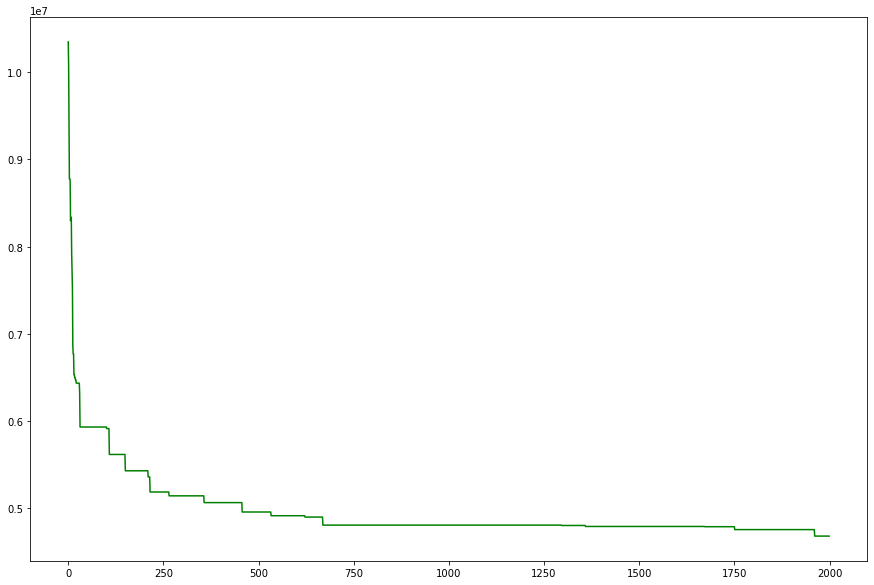

In [66]:
plt.rcParams['figure.figsize'] = [15,10];
plt.plot(range(0, gen), allbest, c="green")

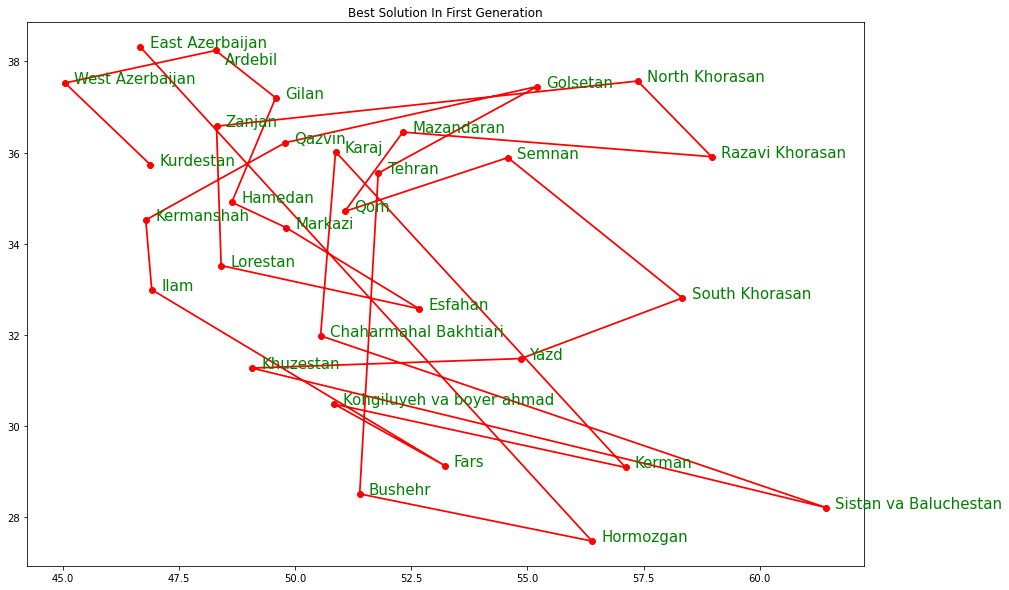

In [72]:
plt.rcParams['figure.figsize'] = [15,10];

string = [(name[i]) for i in range(len(cities))]
for i in range(len(cityCoordinates)):
    plt.plot(citylat[i,1],citylat[i,0], 'ro')
    if i == 0:
        plt.text(citylat[i,1]+0.2 , citylat[i,0]-0.3 ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    else:
        plt.text(citylat[i,1]+0.2 , citylat[i,0] ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    
xx = [citylat[i][0] for i in bestgen[1]]
yy = [citylat[i][1] for i in bestgen[1]]

plt.plot(yy, xx, color="red", linewidth=1.75, linestyle="-")
plt.title("Best Solution In First Generation")
plt.show()

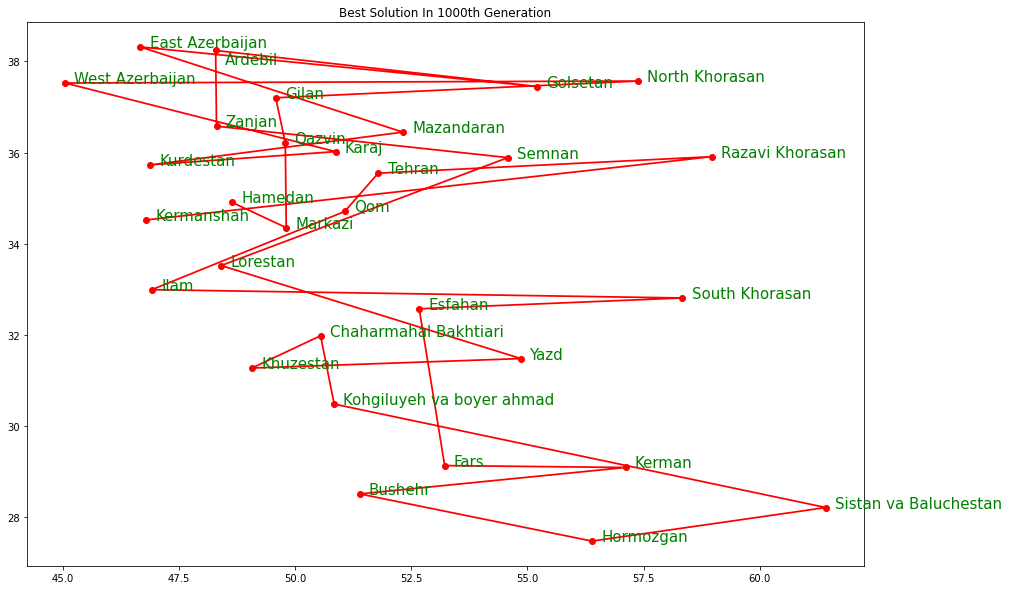

In [71]:
plt.rcParams['figure.figsize'] = [15,10];

string = [(name[i]) for i in range(len(cities))]
for i in range(len(cityCoordinates)):
    plt.plot(citylat[i,1],citylat[i,0], 'ro')
    if i == 0:
        plt.text(citylat[i,1]+0.2 , citylat[i,0]-0.3 ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    else:
        plt.text(citylat[i,1]+0.2 , citylat[i,0] ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    
xx = [citylat[i][0] for i in bestgen[int(len(bestgen) / 2)]]
yy = [citylat[i][1] for i in bestgen[int(len(bestgen) / 2)]]

plt.plot(yy, xx, color="red", linewidth=1.75, linestyle="-")
plt.title("Best Solution In 1000th Generation")
plt.show()

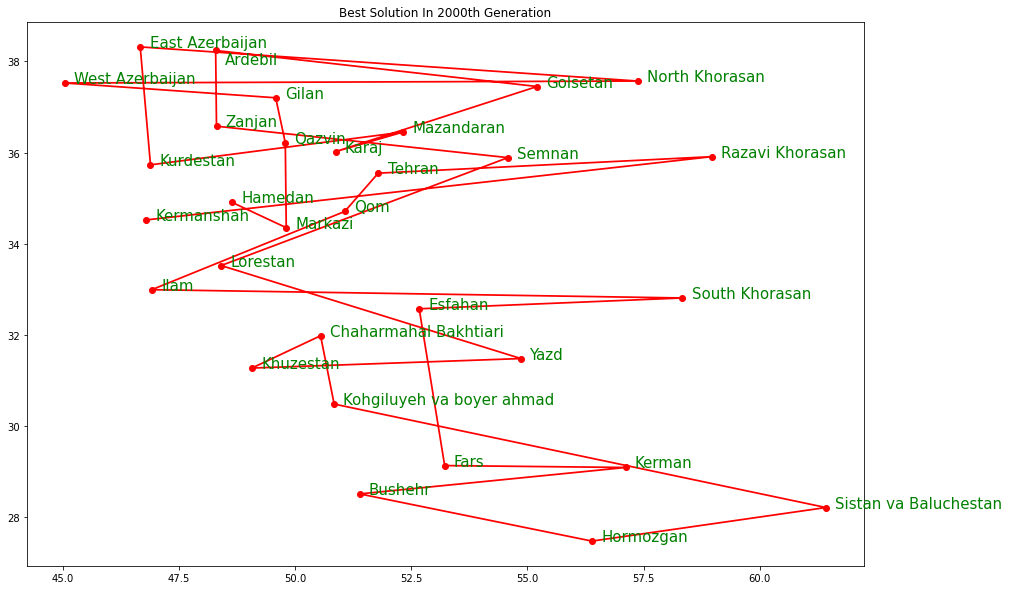

In [70]:
plt.rcParams['figure.figsize'] = [15,10];

string = [(name[i]) for i in range(len(cities))]
for i in range(len(cityCoordinates)):
    plt.plot(citylat[i,1],citylat[i,0], 'ro')
    if i == 0:
        plt.text(citylat[i,1]+0.2 , citylat[i,0]-0.3 ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    else:
        plt.text(citylat[i,1]+0.2 , citylat[i,0] ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    
xx = [citylat[i][0] for i in bestgen[-1]]
yy = [citylat[i][1] for i in bestgen[-1]]

plt.plot(yy, xx, color="red", linewidth=1.75, linestyle="-")
plt.title("Best Solution In 2000th Generation")
plt.show()